In [1]:
import os
os.chdir('Desktop\Учеба')

In [11]:
# 1. Загрузить датасет
import pandas as pd
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# 2. Вычислить основные метрики
import statistics
data['salary'] = data['salary'].factorize()[0]
data['sales'] = data['sales'].factorize()[0]

#  Среднее
average = data.mean()
#  Медиана
cols = list(data)
median = {cols[i] : statistics.median(data[cols[i]]) for i in range(len(cols))}
#  Мода
mode = {}
for i in range(len(cols)):
    try:
        mode[cols[i]] = statistics.mode(data[cols[i]])
    except:
        pass
#  максимальное
maximum = data.max()
#  минимальное
minimum = data.min()
# Стандартное отклонение
stdev = {cols[i] : round(statistics.stdev(data[cols[i]]), 2) for i in range(len(cols))}
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


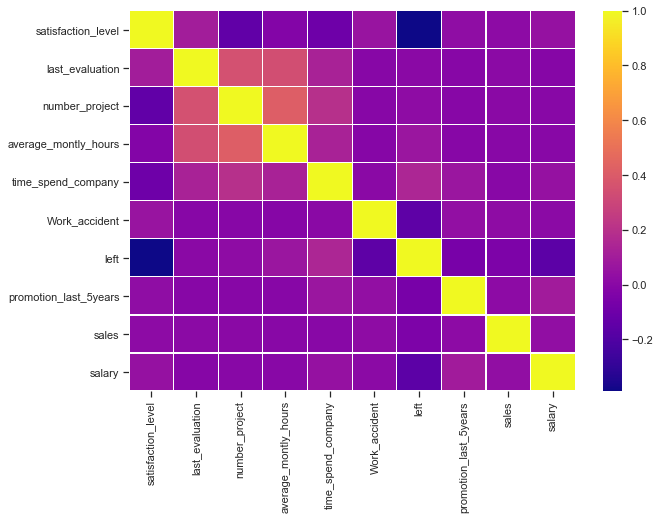

In [4]:
# 3. Построить корреляционную таблицу
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [10, 7]
sns.heatmap(data.corr(), cmap='plasma', linewidth=0.2)
plt.show()

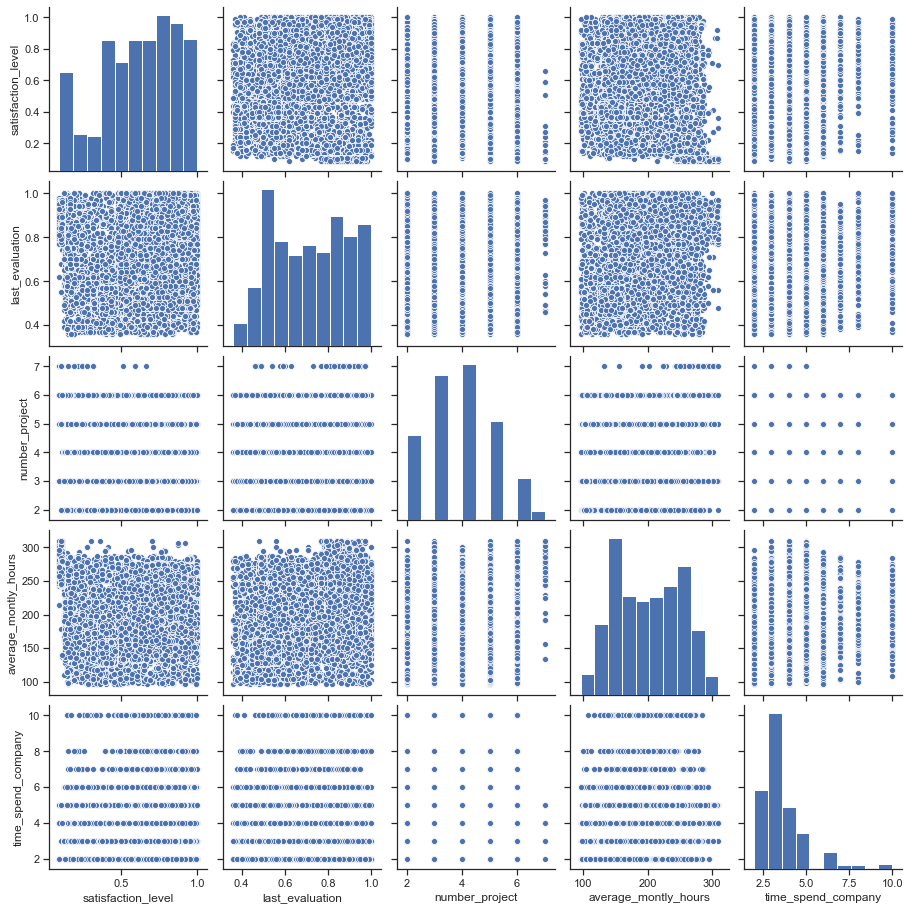

In [5]:
# 4. Визуализировать ряд взаимосвязей
sns.pairplot(data, vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                         'time_spend_company'])
plt.show()
# Отсутствует четко выраженная взаимосвязь между отдельными параметрами, точки сильно рассеяны

In [6]:
# 5. Выдвинуть ряд гипотез, и проверить с помощью т-тестов 
import researchpy as rp
descriptives, results = rp.ttest(data.number_project, data.last_evaluation)
print(descriptives)
print()
print(results)

          Variable        N      Mean        SD        SE  95% Conf.  Interval
0   number_project  14999.0  3.803054  1.232592  0.010064   3.783326  3.822781
1  last_evaluation  14999.0  0.716102  0.171169  0.001398   0.713362  0.718841
2         combined  29998.0  2.259578  1.776700  0.010258   2.239471  2.279684

                                 Independent t-test     results
0  Difference (number_project - last_evaluation) =       3.0870
1                             Degrees of freedom =   29996.0000
2                                              t =     303.8042
3                          Two side test p value =       0.0000
4                         Difference < 0 p value =       1.0000
5                         Difference > 0 p value =       0.0000
6                                      Cohen's d =       3.5081
7                                      Hedge's g =       3.5081
8                                  Glass's delta =       2.5044
9                                          

In [7]:
# Гипотеза №1: Переработки не влияют на количество увольнений
hours_med = data.average_montly_hours.median()
descriptives1, results1 = rp.ttest(data.loc[(data.average_montly_hours > hours_med )].left, \
                                   data.loc[(data.average_montly_hours <= hours_med)].left)
print(descriptives1)
print()
print(results1)
print('Две выборки имеют различие, предполагаем, что большое количество отработанных часов влияет на кол-во увольнений')

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7475.0  0.256187  0.436556  0.005049   0.246289  0.266085
1      left   7524.0  0.220096  0.414339  0.004777   0.210732  0.229459
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899

            Independent t-test     results
0  Difference (left - left) =       0.0361
1        Degrees of freedom =   14997.0000
2                         t =       5.1934
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.0848
7                 Hedge's g =       0.0848
8             Glass's delta =       0.0827
9                         r =       0.0424
Две выборки имеют различие, предполагаем, что большое количество отработанных часов влияет на кол-во увольнений


In [8]:
# Предполагаем, что уровень удовлетворения не влияет на кол-во увольнений
sat_med = data.satisfaction_level.median()
descriptives2, results2 = rp.ttest(data.loc[(data.satisfaction_level > sat_med )].left, \
                                   data.loc[(data.satisfaction_level <= sat_med)].left)
print(descriptives2)
print()
print(results2)
print('модуль t-критерия имеют большую величину чем в предыдущем тесте, две выборки еще больше отличаются')

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7478.0  0.127975  0.334085  0.003863   0.120402  0.135549
1      left   7521.0  0.347560  0.476227  0.005491   0.336796  0.358325
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899

            Independent t-test     results
0  Difference (left - left) =      -0.2196
1        Degrees of freedom =   14997.0000
2                         t =     -32.6728
3     Two side test p value =       0.0000
4    Difference < 0 p value =       0.0000
5    Difference > 0 p value =       1.0000
6                 Cohen's d =      -0.5336
7                 Hedge's g =      -0.5335
8             Glass's delta =      -0.6573
9                         r =       0.2578
модуль t-критерия имеют большую величину чем в предыдущем тесте, две выборки еще больше отличаются


In [9]:
sat_25 = data.satisfaction_level.quantile(q=0.25)
hours_75 = data.time_spend_company.quantile(q=0.75)
descriptives3, results3 = rp.ttest(data.loc[data.satisfaction_level < sat_25].left, \
                                   data.loc[data.time_spend_company > hours_75].left)
print(descriptives3)
print()
print(results3)
# Попытки найти сходство в данных между сотрудниками с низким уровнем удовлетворения и большой загруженностью
# так же не дали желаемого результата

   Variable       N      Mean        SD        SE  95% Conf.  Interval
0      left  3674.0  0.586010  0.492614  0.008127   0.570076  0.601944
1      left  2755.0  0.378221  0.485031  0.009241   0.360102  0.396341
2  combined  6429.0  0.496967  0.500030  0.006236   0.484742  0.509192

            Independent t-test    results
0  Difference (left - left) =      0.2078
1        Degrees of freedom =   6427.0000
2                         t =     16.8475
3     Two side test p value =      0.0000
4    Difference < 0 p value =      1.0000
5    Difference > 0 p value =      0.0000
6                 Cohen's d =      0.4246
7                 Hedge's g =      0.4245
8             Glass's delta =      0.4218
9                         r =      0.2057


In [12]:
# Предположим, что чтобы найти зависимость, следует разделить сотрудников исходя из департамента и уровня заработной платы,
# возможно, рассеивание данных будет меньше
pv = pd.pivot_table(data, 'left', ['sales'], columns='salary', aggfunc='mean', \
                    margins=True).sort_values('low', ascending=True)
pv

salary,high,low,medium,All
sales,,,,
RandD,0.078431,0.151099,0.166667,0.153748
product_mng,0.088235,0.232816,0.227154,0.219512
hr,0.133333,0.274627,0.325905,0.290934
technical,0.124378,0.275510,0.256321,0.256250
accounting,0.067568,0.276536,0.298507,0.265971
IT,0.048193,0.282430,0.181308,0.222494
All,0.066289,0.296884,0.204313,0.238083
marketing,0.112500,0.313433,0.180851,0.236597
management,0.004444,0.327778,0.137778,0.144444


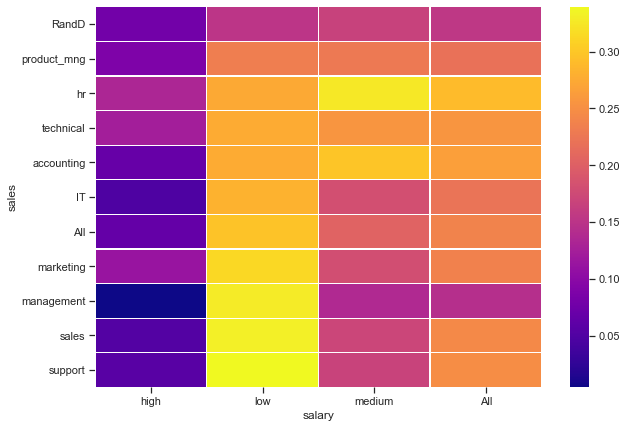

In [13]:
sns.heatmap(pv, cmap='plasma', linewidth=0.2)
plt.show()

In [14]:
descriptives4, results4 = rp.ttest(data.loc[(data.sales=='support') & (data.salary=='low')].left, \
                                   data.loc[(data.sales=='sales') & (data.salary=='low')].left)
print(descriptives4)
print()
print(results4)
# Две данные выборки действительно похожи, продолжим исследования в рамках фильтра по отделам и зарплатам

   Variable       N      Mean        SD        SE  95% Conf.  Interval
0      left  1146.0  0.339442  0.473727  0.013994   0.311985  0.366898
1      left  2099.0  0.332063  0.471066  0.010282   0.311899  0.352227
2  combined  3245.0  0.334669  0.471947  0.008285   0.318425  0.350913

            Independent t-test    results
0  Difference (left - left) =      0.0074
1        Degrees of freedom =   3243.0000
2                         t =      0.4256
3     Two side test p value =      0.6704
4    Difference < 0 p value =      0.6648
5    Difference > 0 p value =      0.3352
6                 Cohen's d =      0.0156
7                 Hedge's g =      0.0156
8             Glass's delta =      0.0156
9                         r =      0.0075


In [15]:
# 6. Посчитать количество сотрудников в департаменте
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

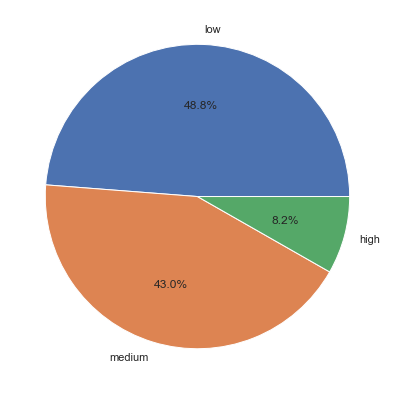

In [16]:
# 7. Распределение сотрудников по зарплатам
plt.pie(data.salary.value_counts(), labels=data.salary.unique(), autopct='%0.1f%%')
plt.show()

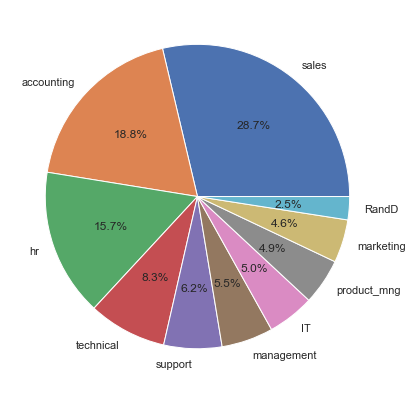

In [17]:
# 8 Распределение сотрудников по зарплатам совместно с отделами
#  8.1 Низкие
plt.pie(data[data.salary=='low'].sales.value_counts(), labels=data.sales.unique(), autopct='%0.1f%%')
plt.show()

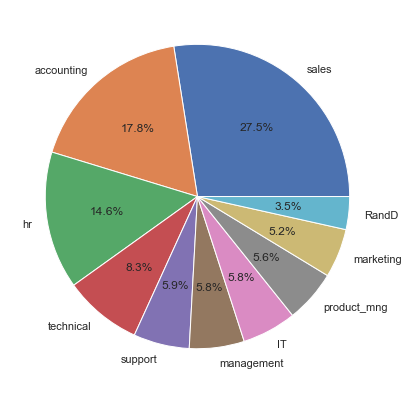

In [18]:
#  8.2 Средние
plt.pie(data[data.salary=="medium"].sales.value_counts(), labels=data.sales.unique(), autopct='%0.1f%%')
plt.show()

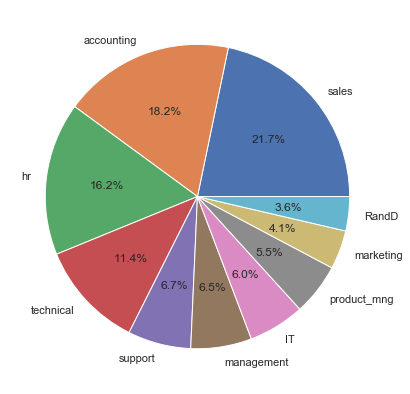

In [19]:
#  8.3 Высокие
plt.pie(data[data.salary=='high'].sales.value_counts(), labels=data.sales.unique(), autopct='%0.1f%%')
plt.show()

In [20]:
#  9. Посчитать, сколько сотрудников покинули компанию
data.left.sum()


3571

In [21]:
# 10. Проверить ряд, гипотез, чтобы определить, почему сотрудники покидают компанию
# Воспользуемся моделью "дерево случайных решений", чтобы с помощью инструмента feature_importances_ определить, какаой
# параметр больше всего сподвигает сотрудников на увольнение
dataset = data
dataset.sales = pd.factorize(dataset.sales)[0]
dataset.salary = pd.factorize(dataset.salary)[0]
dataset_train = dataset.drop(['left'], axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset_train, dataset['left'], test_size=0.5)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
# Увольнение - это дискретное состояние, факт во времени, принимает значение единицы в случае наступления ряда факторов, 
# чем больше наступило событий влияющих на приближение увольнения, тем больше вероятность увольнения сотрудника
headers = list(x_train.columns.values)
features = pd.Series(model.feature_importances_, index=headers).sort_values(ascending=False)
features
# Результат отбора признаков показал, что уровень заработной планы практически не влияет на количество уволнений

satisfaction_level       0.328149
time_spend_company       0.190284
number_project           0.183518
average_montly_hours     0.152141
last_evaluation          0.117591
sales                    0.012665
salary                   0.009455
Work_accident            0.005186
promotion_last_5years    0.001010
dtype: float64

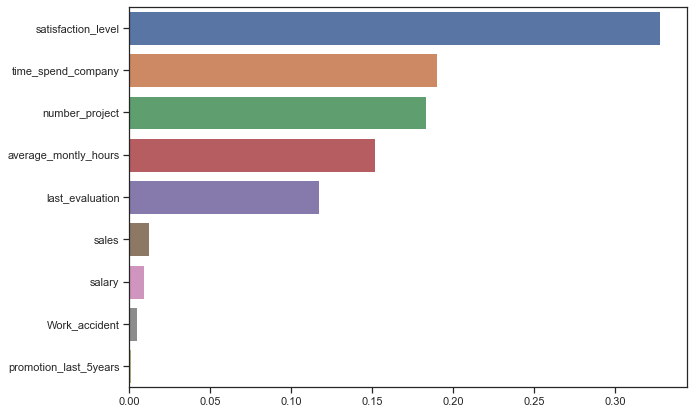

In [24]:
sns.barplot(x=features, y=features.index)
plt.show()

In [27]:
from sklearn.metrics import classification_report
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))
model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5666
           1       0.99      0.95      0.97      1834

    accuracy                           0.99      7500
   macro avg       0.99      0.98      0.98      7500
weighted avg       0.99      0.99      0.99      7500



0.9870666666666666

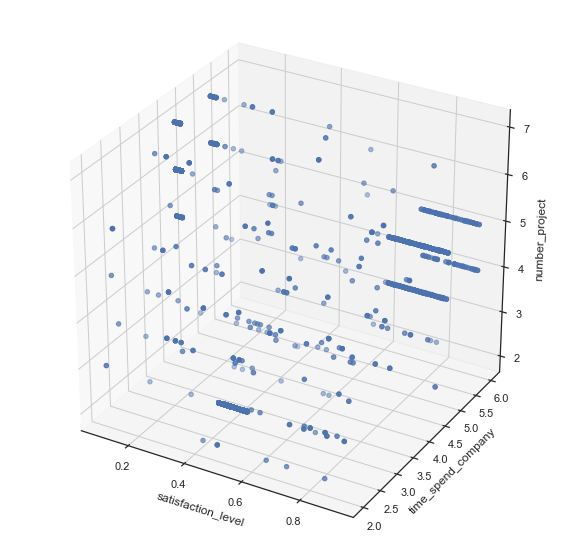

In [28]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
a = dataset.loc[dataset['left'] == 1, 'satisfaction_level']
b = dataset.loc[dataset['left'] == 1, 'time_spend_company']
c = dataset.loc[dataset['left'] == 1, 'number_project']
ax.scatter(a, b, c, c='b')
ax.set_xlabel('satisfaction_level')
ax.set_ylabel('time_spend_company')
ax.set_zlabel('number_project')
plt.show()

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Principal_Components = pca.fit_transform(dataset)
projected_x = pd.DataFrame(Principal_Components, columns = ['a1', 'a2', 'a3'])
projected_x['left'] = dataset['left']


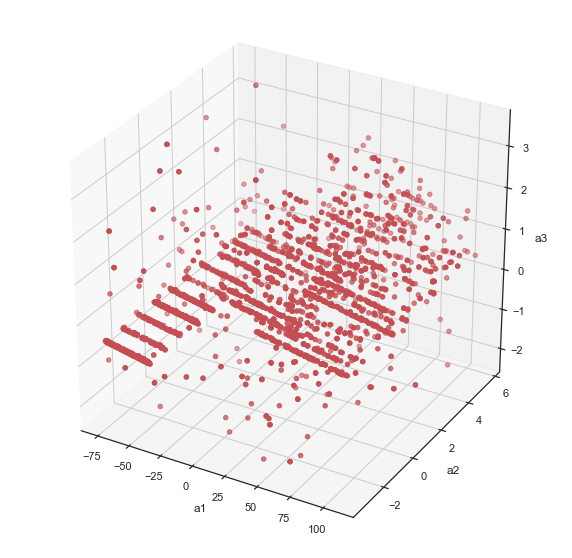

In [30]:

fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.gca(projection='3d')
 
a = projected_x.loc[projected_x['left'] == 1, 'a1']
b = projected_x.loc[projected_x['left'] == 1, 'a2']
c = projected_x.loc[projected_x['left'] == 1, 'a3']
ax1.scatter(a, b, c, c='r')

ax1.set_xlabel('a1')
ax1.set_ylabel('a2')
ax1.set_zlabel('a3')
plt.show()